In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from dataloader import load_raw
from measures import compute_intermittent_indicators, label_intermittent

sns.set()

In [23]:
datasets_names = ['crime', 'RAF', 'carparts', 'Auto']

datasets = {dataset:{} for dataset in datasets_names}
for dataset in datasets_names:
    data_raw, data_info = load_raw(dataset_name=dataset, datasets_folder_path=os.path.join("..","data"))
    data, h = np.array(data_raw.values), data_info['h']
    data = data[~np.all(data[:,:-h*2] == 0, axis=1)]
    data = data[~np.any(np.isnan(data), axis=1)]
    adi, cv2 = compute_intermittent_indicators(data_raw, data_info['h'])

    datasets[dataset]['adi'], datasets[dataset]['cv2'] = adi, cv2
    datasets[dataset]['subsets'] = {'all':np.repeat(True, len(data_raw)),
                                       'intermittent_and_lumpy': adi >= 1.32, 
                                       'intermittent': np.logical_and(adi >= 1.32, cv2 < .49)}
    datasets[dataset]['prop_zero'] = np.array(data == 0, dtype=int).mean(axis=1)
    datasets[dataset]['median_demand'] = np.array([np.median(y[y>0]) for y in data])

subset = 'intermittent_and_lumpy'

for dataset in datasets_names:
    filter = datasets[dataset]['subsets'][subset]
    print(dataset, np.sum(filter))
    for stat in ['adi', 'cv2', 'prop_zero', 'median_demand']:
        datasets[dataset][stat] = datasets[dataset][stat][filter]




crime 91
RAF 5000
carparts 2489
Auto 1227


/var/folders/45/r6vhpq6d7yj0pb5pqhmyrksr0000gp/T/ipykernel_42159/3001629339.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[0].set_ylim(0, 10)
/var/folders/45/r6vhpq6d7yj0pb5pqhmyrksr0000gp/T/ipykernel_42159/3001629339.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([datasets[dataset]['prop_zero'] for dataset in datasets.keys()], labels=datasets_names)
/var/folders/45/r6vhpq6d7yj0pb5pqhmyrksr0000gp/T/ipykernel_42159/3001629339.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot([datasets[dataset]['median_demand'] for dataset in datasets.keys()], labels=datasets_names, sym='')


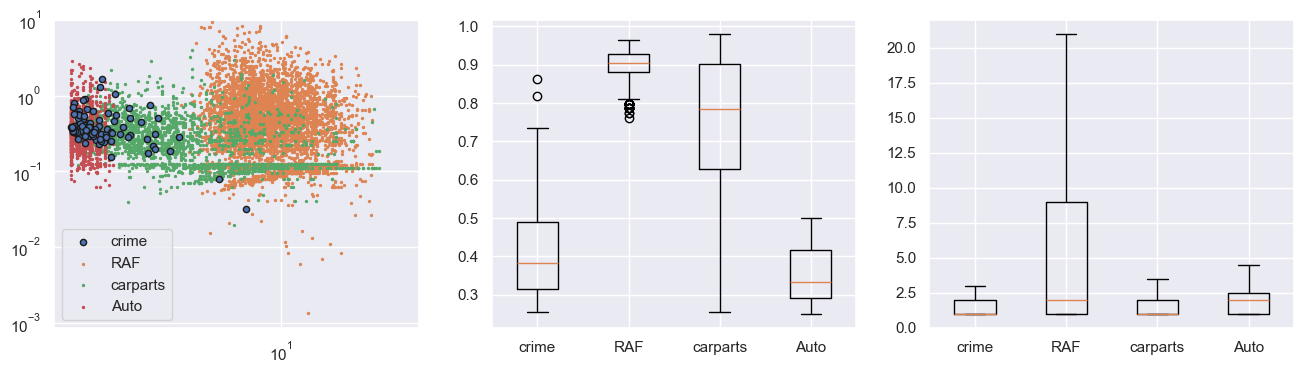

In [24]:

fig, axes = plt.subplots(1,3, figsize=(16, 4))

for i, dataset in enumerate(datasets_names):
    if i == 0:
        axes[0].scatter(datasets[dataset]['adi'], datasets[dataset]['cv2'], s=20, edgecolors='k', label = dataset, zorder=10)
    else:
        axes[0].scatter(datasets[dataset]['adi'], datasets[dataset]['cv2'], s=2, label= dataset)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].legend()
axes[0].set_ylim(0, 10)


axes[1].boxplot([datasets[dataset]['prop_zero'] for dataset in datasets.keys()], labels=datasets_names)


axes[2].boxplot([datasets[dataset]['median_demand'] for dataset in datasets.keys()], labels=datasets_names, sym='')

plt.show()

In [4]:
stat

'median_demand'